In [2]:
%%javascript
require("base/js/utils").load_extensions("highlighter/highlighter")

<IPython.core.display.Javascript object>

## jump to cell 196 for the architecture...

# Some thoughts on AI..

### When learning any new field <span class="girk">focus on the most fundamental aspects</span> of it ...we call them first-principles in physics - try to learn them and learn them thoroughly.....gives the most bang for buck.Here i share core mental models/ideas that seems  to be the most fundamental..(in regard to deep cnn's)

## Why do we do convolutions ... why can't we have a fully connected network (as it can theoritically approximate any functions...there are some gotchas though...)?


<img src='conv.png'>

##To answer that let's first see what convolutions are....
### Ref - [convolution arthmetic](https://github.com/vdumoulin/conv_arithmetic)

### So convolution as an operation is a fairly trivial but the reason it's working is simply we copied what we know from animal visual system(when we look at objects we don't look at them continuosly instead we scan through chunks of it briefly pausing at the relevant points..these are called saccades..).So cnn's are computational equivalent albeit a very crude one(without accurate pausing mechanism or attention..) -  it's important to see things in terms of receptive field.This is probably the single most important idea and i saw nobody teaching it thoroughly...this paper [EFFECTIVE RECEPTIVE FIELD](https://arxiv.org/abs/1701.04128) is a worth read.


 <span class="girk">The receptive field is defined as the region in the input space that a particular CNN’s feature is looking at (i.e. be affected by). A receptive field of a feature can be described by its center location and its size</span>

<img src='receptive.png'>

# some practical thoughts on buildng deep nets:

### LOT OF THE STUFF HERE IS DRIVEN BY EXPERIMENTATION...<span class="girk">ATLEAST AS OF NOW THERE ARE NO STRONG THEORITICAL TOOLS TO COME UP WITH GOOD ARCHITECTUREs....</span>
### For now we will have to develop strong intuitions based on what's working ...<span class="girk">i'm not sure if any of these skills would still remain relevant after five years or so...the tools we use are still not mature...ideally we should have plug and play tools that would let us solve our specific problems by little or no training.</span> 


### THREE BASIC STEPS:
* GET THE DATA
* GET THE ARCHITECTURE
* FIND A WAY TO TRAIN OPTIMALLY(IN LIMITED TIME WITH GOOD CONVERGENCE..)

FIRST LET'S SEE ABOUT ARCHITECTURES THAN ...TRAINING HACKS...

### <span class="burk">ASIDE: ON UNDERSTANDING CONVOLUTIONS AND TRANSPOSED CONVOLUTIONS...</span>

        * full-padding(increase width) and half-padding(same-width)
        * transposed convolution arthmetic.


<img src='convar.png'>

* Take for example the convolution represented in Figure 2.1. If the input and
output were to be unrolled into vectors from left to right, top to bottom, the
convolution could be represented as a sparse matrix C where the non-zero elements
are the elements wi,j of the kernel (with i and j being the row and column
of the kernel respectively):


<img src='mat.png'>

* transposed convolution(useful for encoder-decoder arch..) is nothing but ...multiplying with it's transpose...
* Using this representation, the backward pass is easily obtained by transposing
C; in other words, the error is backpropagated by multiplying the loss
with CT
. This operation takes a 4-dimensional vector as input and produces
a 16-dimensional vector as output, and its connectivity pattern is compatible
with C by construction.

## SOME POINTERS ..FOR BUILDING NEWER ARCHITECTURES....as i learned

#### Theoritical insights:

##### motivation:
<span class="girk">Do universal principles of deep network design exist? Can these
principles be mined from the collective knowledge on deep learning? Which architectural choices
work best in any given context? Which architectures or parts of architectures seem elegant?(ref:Rethinking Inception..)</span>
* STRIVE FOR ELEGANCE OVER KLUDGE: WHEN EVER YOU HAVE TWO ARCHITECTURAL PATTERNS WITH SIMILAR RESULTS EVEN THOUGH THE OTHER SEEMS TO BE MORE THEORETICALLY SOPHISTICATED CHOOSE THE SIMPLER ONE.(SIMPLE WIDE RESNET OVER FRACTAL NETWORK)
* Don't go about creating bottle necks .(sudden reduction in representation capacity over single layer)
* Balance between depth vs width.
* We reduce the feature map width until we flatten into collection of features that are most suitable for the task at hand......always ensure to do dimensionality reduction before spatial aggregation(convolution) eg:1 x 1 conv before say a 5 x 5 not <span class="girk">only helps in reducing computiations but has the subtle effect of incorporating our prior about vision networks: The outputs of near-by activations are highly correlated. Therefore, we can expect that their activations can be reduced before aggregation and that this should result in similarly expressive local representations.</span> \
* Higher dimensional representations promote more disentangled features
 
#### practical implications:
* simpler architectures work better...why 3 x 3 not 7x7(bigger receptive field)...it's easy to see that we incorporate three non-linear rectification layers instead of a single one, which makes the decision function more discriminative.Second, we decrease the number of parameters: assuming that both the input and the output of a three-layer 3 × 3 convolution stack has C channels.<span class="girk">This can be seen as imposing a regularisation on the 7 × 7 conv. filters, forcing them to have a decomposition through the 3 × 3 filters</span> (with non-linearity injected in between)

## TRAINING HACKS
* MULTICROP-EVALUATION OR TEST-TIME AUGMENTATION FOR BETTER ACCURACY
* The change in the distributions of layers’ inputs presents a problem because the layers need to continuously 
adapt to the new distribution.

### HERE I WILL SHARE SOME OF THE TRAINING TECHNIQUES WHICH EVEN SOME OF THE TOP RESEARCHERES ARE NOT USING YET..(to the best of my knowledge) and these will let us train and reach convergence much faster...

## All the credits goes to this brilliant researcher named Leslie N.smith...
* cyclical-learning-rates
  * conventional wisdom :learning rate should be a single value that monotonically decreases during training.
  * But:with no additional computation (unlike adaptive learning rates) it is observed that by periodically varying lr between two fixed points - details in the paper by the same name we can achieve faster convergence..
  suggestion:An overview of gradient descent optimization algorithms SEBASTIAN RUDER.(it's a good paper to familarize with gradient based optimisation techniques)
  
 * [Super-Convergence:Very Fast Training of Neural Networks Using Large ](https://arxiv.org/abs/1708.07120).
 
 * [A disciplined approach to neural network hyper-parameters](https://arxiv.org/abs/1803.09820 )
 .(This is an absolutely amazing paper..<span class="girk">they even provide code implementation at the end .. imagine every body doing
 that .. anybody can learn deep learning on a weekend but they won't do it...that would make their phd's less cool..</span>)
 These papers are really cool.please read them
     


* REFERENCES:WHAT'S WRONG WITH ADAM [ADAMW](http://www.fast.ai/2018/07/02/adam-weight-decay/) THEY TRAINED CIFAR 10 in 18 EPOCHS(>94%)..that's crazy.....
* sebastian ruder's blog [NEURAL NETWORK BASED OPTIMIZATION TECHNIQUES](http://ruder.io/optimizing-gradient-descent/)


 * SYLVIAN GUGGER IMPLEMENTED 1CYCLE POLICY IN PYTORCH - [READ HIS BLOG](https://sgugger.github.io/the-1cycle-policy.html).
 
 

### SGD WITH MOMENTUM
for p in parameters:  
       
        v[p] = beta * v[p] + lr * p.grad  
        p = p - v[p]  
        
excecise: try to write other variants like nestrov..adam..        
        



#### I spent some time trying to understand the computation principles behind natural intelligence...(humans) <span class="girk">one underlying principle seems to be sparse non-uniform activations [title]https://arxiv.org/abs/1310.6343. and they are no-where as structured as our models(cnn's)...In fact really smart people have known that ... some trials like inception network is an attempt to introduce some sparsity at the convolution-level itself(INCEPTION MODULE...to introduce filter level sparsity aside from spatial sparsity given by traditional conv layer...)</span>

## NOTE:I AM NOT SURE WHETHER IT'S PRACTICALLY NEEDED BASED ON MY PERSONAL EXPERIANCE MANY THINGS WITH GOOD THEORITICAL RESULTS DON'T MAKE IMPACT PRACTICALLY..
### why conv layer ?(conv followed by non -linear activation)
* Essentially we want to map the local-receptive field to the confidence value of the latent-concept(low-level ones like edgeiness or the high level ..presence of eyes.. ).<span class="mark">CNN IS JUST ONE SENSIBLE WAY AMONG INFINITELY POSSIBLE ways..</span>...Refer:eg:NETWORK IN NETWORK


<img src = 'batch.png'>

* HERE WE WILL USE A PRETRAINED-NET AND USE IT FOR TANSFER LEARNING...<span class="girk">In real life knowing how to use transfer learning is more important but customizing the network for your specific use requires certain hacks..i have used the following techniques quite successfully across the range of problems with almost ..the same steps everywhere..</span>
* Training hacks are taken from these papers:
    * Cyclical Learning Rates for Training Neural Networks
    * Super-Convergence: Very Fast Training of Neural Networks Using Large Learning Rates
    
* i have used relatively simple problem for demonstration....    

## HERE'S THE SIMPLE IMPLEMENTATION OF KERAS SQUEEZE NET...I HOPE I HAVE INCLUDED SOME CONTEXT BEFORE BLINDLY JUMPING INTO IMPLEMENTATION ... I HAVE KEPT THIS IMPLEMENTATION SUPER SIMPLE BUT ALL THE IDEAS I SHARED HERE CAN BE APPLIED..

# SO WHAT'S THE IDEA OF SQUEEZE-EXCITE NET IN ONE LINE ?
## <span class="girk">Instead of multipling the channels with random weights why not weigh them based on global information before doing any further processing..</span>

In [ ]:
# def se_block(in_block, ch, ratio=16):
#     x = GlobalAveragePooling2D()(in_block)
#     x = Dense(ch//ratio, activation='relu')(x)
#     x = Dense(ch, activation='sigmoid')(x)
#     return multiply()([in_block, x])





# <span class="girk">The following process shows my real-world approach in testing/understanding of any paper:</span>

# Here i will use a real world dataset cats-dogs from kaggle..but with a twist we will only use 1500 images from the dataset see how squeeze net fares .. by running several abalation studies...

In [20]:
import glob
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline

Using TensorFlow backend.


In [11]:
files = glob.glob('train/*')
len(files)

16205

In [12]:

cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]
len(cat_files), len(dog_files)

(8179, 8026)

In [13]:
cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))

cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (500,) (500,)
Dog datasets: (1500,) (500,) (500,)


In [19]:
train_dir = 'cats_dogs_training_data'
val_dir = 'cats_dogs_validation_data'
test_dir = 'cats_dogs_test_data'
train_files = np.concatenate([cat_train, dog_train])
validate_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in log_progress(train_files, name='Training Images'):
    shutil.copy(fn, train_dir)

for fn in log_progress(validate_files, name='Validation Images'):
    shutil.copy(fn, val_dir)
    
for fn in log_progress(test_files, name='Test Images'):
    shutil.copy(fn, test_dir)

## NOTE:ALWAY KEEP TRACK OF COMPUTE TIME
# Follow a three step procedure(Typical data scientist approach to dl..) :
# 1.Construct a simple cnn - for a baseline
# 2.Check the performance on transfer learning - for an upper thershold
# 3.Additionally try simple techniques : data aug,batchnorme...etc
# 4. Finally,evaluate your idea..in this case squeeze nets..

In [21]:
# STEP:1

In [ ]:
IMG_DIM = (150, 150)

train_files = glob.glob('cats_dogs_training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)

In [38]:
# use os.sep..for correct splitting
train_labels = [fn.split(os.sep)[1].split('.')[0].strip() for fn in train_files]

In [39]:
validation_files = glob.glob('cats_dogs_validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split(os.sep)[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [45]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


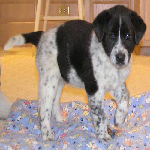

In [40]:
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

# <span class="girk">some EDA(exploratory data analysis) before designing any architecture..</span>

In [92]:
import os
import scipy as sp
import numpy as np
import pandas as pd

import PIL
import scipy.ndimage as spi

import matplotlib.pyplot as plt
%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
import seaborn as sns

plt.rcParams.update(params)

np.random.seed(42)

In [93]:
# This function prepares a random batch from the dataset
def load_batch(dataset_df, batch_size = 25):
    batch_df = dataset_df.loc[np.random.permutation(np.arange(0,
                                                              len(dataset_df)))[:batch_size],:]
    return batch_df

In [119]:
# This function plots sample images in specified size and in defined grid
def plot_batch(images_df, grid_width, grid_height, im_scale_x, im_scale_y):
    f, ax = plt.subplots(grid_width, grid_height)
    f.set_size_inches(12, 12)
    
    img_idx = 0
    for i in range(0, grid_width):
        for j in range(0, grid_height):
            ax[i][j].axis('off')
            ax[i][j].set_title(images_df.iloc[img_idx,0])
            ax[i][j].imshow(sp.misc.imresize(train_imgs[images_df.index[img_idx]],
                                             (im_scale_x,im_scale_y)))
            img_idx += 1
            
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.25)

In [100]:
eda_labels = pd.DataFrame({'category':train_labels})

In [103]:
batch_df = load_batch(eda_labels, 
                    batch_size=36)

/home/vinay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


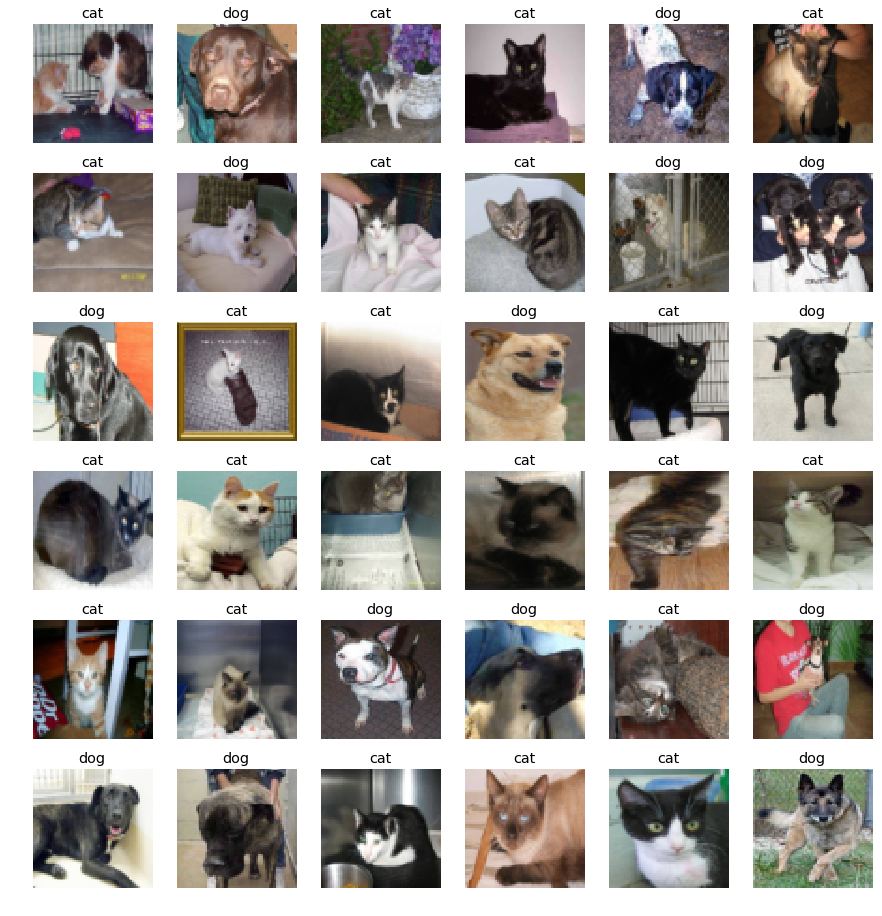

In [120]:
plot_batch(batch_df, grid_width=6, grid_height=6
           ,im_scale_x=64, im_scale_y=64)

# encoding labels

In [41]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog'] [1 1 0 0 1 0 1 1 1 1]


In [42]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [50]:
%%time
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4379 - acc: 0.7973 - val_loss: 0.5878 - val_acc: 0.7390
Epoch 2/30
3000/3000 [==============================] - 4s 1ms/step - loss: 0.3517 - acc: 0.8447 - val_loss: 0.6158 - val_acc: 0.7250
Epoch 3/30
3000/3000 [==============================] - 4s 1ms/step - loss: 0.2654 - acc: 0.8930 - val_loss: 0.6925 - val_acc: 0.7310
Epoch 4/30
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1725 - acc: 0.9310 - val_loss: 0.8899 - val_acc: 0.7520
Epoch 5/30
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1085 - acc: 0.9597 - val_loss: 1.0625 - val_acc: 0.7200
Epoch 6/30
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0848 - acc: 0.9737 - val_loss: 1.6506 - val_acc: 0.6840
Epoch 7/30
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0582 - acc: 0.9797 - val_loss: 1.5219 - val_acc: 0.7180
Epoch 8/30
300

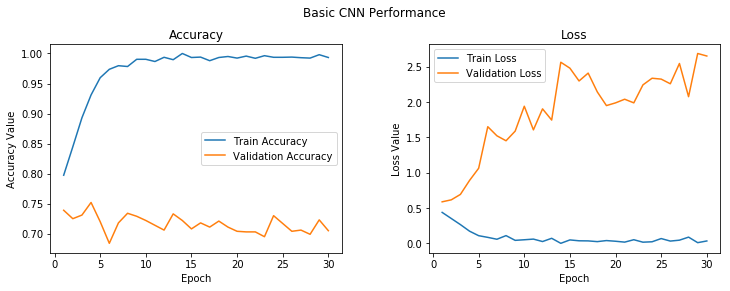

In [51]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# now use the  same network but with some  additional techniques

In [52]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [53]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 4s 1ms/step - loss: 0.7836 - acc: 0.5077 - val_loss: 0.7906 - val_acc: 0.5000
Epoch 2/30
3000/3000 [==============================] - 3s 998us/step - loss: 0.6941 - acc: 0.5500 - val_loss: 0.6759 - val_acc: 0.5800
Epoch 3/30
3000/3000 [==============================] - 3s 998us/step - loss: 0.6879 - acc: 0.6160 - val_loss: 0.6360 - val_acc: 0.6580
Epoch 4/30
3000/3000 [==============================] - 3s 983us/step - loss: 0.6335 - acc: 0.6623 - val_loss: 0.6026 - val_acc: 0.6810
Epoch 5/30
3000/3000 [==============================] - 3s 956us/step - loss: 0.5786 - acc: 0.7100 - val_loss: 0.5766 - val_acc: 0.6860
Epoch 6/30
3000/3000 [==============================] - 3s 983us/step - loss: 0.5163 - acc: 0.7530 - val_loss: 0.5614 - val_acc: 0.7300
Epoch 7/30
3000/3000 [==============================] - 3s 924us/step - loss: 0.4681 - acc: 0.7900 - val_loss: 0.5370 - val_acc: 0.7250
Ep

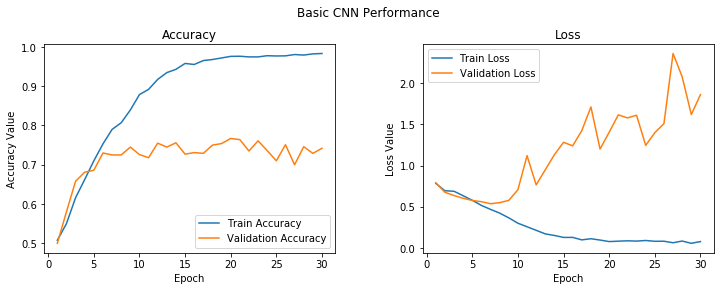

In [59]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [60]:
model.save('cats_dogs_basic_cnn.h5')

# Now we can empirically note the effect of dropout

# NOW LET'S SEE THE EFFECT OF DATA AUGMENTATION

In [62]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

#note:WE SHOULD'NT APPLY IMAGE AUGMENTATION ON VAL_data...except for kaggle..(i call it test-time-augmentation
#where i average out the predictions for several aug samples of same test image..before submitting.)
val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


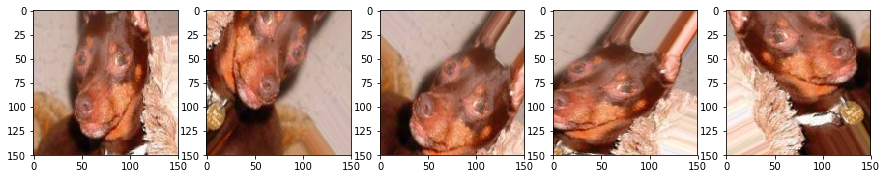

In [64]:
img_id = 1991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [65]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

input_shape = (150, 150, 3)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [66]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 12s 118ms/step - loss: 0.6948 - acc: 0.5053 - val_loss: 0.6866 - val_acc: 0.5400
Epoch 2/100
100/100 [==============================] - 11s 111ms/step - loss: 0.6868 - acc: 0.5517 - val_loss: 0.6752 - val_acc: 0.5570
Epoch 3/100
100/100 [==============================] - 12s 123ms/step - loss: 0.6791 - acc: 0.5647 - val_loss: 0.6653 - val_acc: 0.5800
Epoch 4/100
100/100 [==============================] - 13s 130ms/step - loss: 0.6660 - acc: 0.5827 - val_loss: 0.6605 - val_acc: 0.6030
Epoch 5/100
100/100 [==============================] - 13s 132ms/step - loss: 0.6535 - acc: 0.6057 - val_loss: 0.6800 - val_acc: 0.5600
Epoch 6/100
100/100 [==============================] - 13s 134ms/step - loss: 0.6456 - acc: 0.6177 - val_loss: 0.6530 - val_acc: 0.6250
Epoch 7/100
100/100 [==============================] - 15s 150ms/step - loss: 0.6377 - acc: 0.6270 - val_loss: 0.6029 - val_acc: 0.6720
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 25s 254ms/step - loss: 0.4452 - acc: 0.7827 - val_loss: 0.4410 - val_acc: 0.8030
Epoch 62/100
100/100 [==============================] - 18s 182ms/step - loss: 0.4419 - acc: 0.7897 - val_loss: 0.4502 - val_acc: 0.8000
Epoch 63/100
100/100 [==============================] - 21s 211ms/step - loss: 0.4335 - acc: 0.8003 - val_loss: 0.5094 - val_acc: 0.7880
Epoch 64/100
100/100 [==============================] - 21s 215ms/step - loss: 0.4310 - acc: 0.8040 - val_loss: 0.4276 - val_acc: 0.8000
Epoch 65/100
100/100 [==============================] - 21s 211ms/step - loss: 0.4247 - acc: 0.8023 - val_loss: 0.4294 - val_acc: 0.8140
Epoch 66/100
100/100 [==============================] - 21s 213ms/step - loss: 0.4214 - acc: 0.8087 - val_loss: 0.4198 - val_acc: 0.8120
Epoch 67/100
100/100 [==============================] - 22s 216ms/step - loss: 0.4321 - acc: 0.8037 - val_loss: 0.6679 - val_acc: 0.7460
Epoch 68/100
100/100 [===================

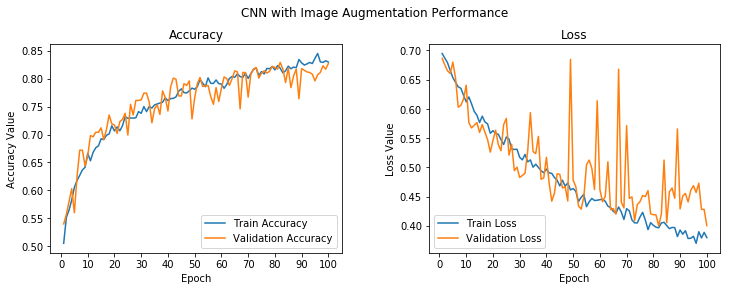

In [67]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [68]:
model.save('cats_dogs_cnn_img_aug.h5')

# THAT's a phenomenol increase in accuracy but still not so good..

In [69]:
# cnn with pretrained net
from keras.applications import vgg16

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

58892288/58889256 [==============================] - 246s 4us/step


In [76]:
import keras
from keras.models import Model
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [77]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fc90c5fcac8>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7fc90c5fcd68>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fc90c5fcc18>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fc90c58c160>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fc90c5da588>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fc90c5ba358>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fc90c550748>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fc90c5505c0>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fc90c5030f0>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fc90c51a1d0>,block3_conv3,False


In [79]:
vgg.trainable_weights # ok we are sure that all weights are frozen..

[]

(1, 4, 4, 512)


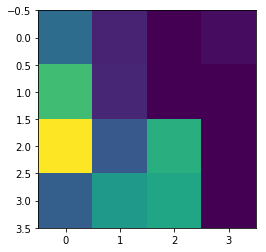

In [80]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [81]:
def get_bottleneck_features(model, input_imgs):
    
    features = model.predict(input_imgs, verbose=0)
    return features

In [82]:
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [83]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


# Downside : here we cannot use data-augmentation

In [84]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 1s 335us/step - loss: 0.4320 - acc: 0.7880 - val_loss: 0.3471 - val_acc: 0.8370
Epoch 2/30
3000/3000 [==============================] - 1s 177us/step - loss: 0.3044 - acc: 0.8693 - val_loss: 0.3066 - val_acc: 0.8560
Epoch 3/30
3000/3000 [==============================] - 1s 187us/step - loss: 0.2416 - acc: 0.8967 - val_loss: 0.2586 - val_acc: 0.8790
Epoch 4/30
3000/3000 [==============================] - 1s 192us/step - loss: 0.2231 - acc: 0.9113 - val_loss: 0.2407 - val_acc: 0.8930
Epoch 5/30
3000/3000 [==============================] - 1s 190us/step - loss: 0.1732 - acc: 0.9300 - val_loss: 0.2610 - val_acc: 0.8830
Epoch 6/30
3000/3000 [==============================] - 1s 195us/step - loss: 0.1520 - acc: 0.9360 - val_loss: 0.2895 - val_acc: 0.8810
Epoch 7/30
3000/3000 [==============================] - 1s 183us/step - loss: 0.1281 - acc: 0.9500 - val_loss: 0.2688 - val_acc: 0.8840


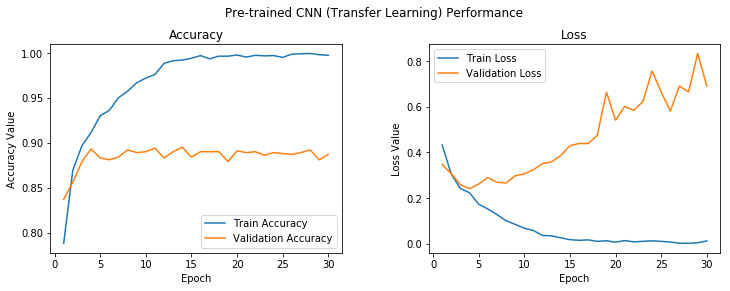

In [85]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# we can see how we are overfitting with high seperation between train and val accuray after 3rd epoch..next i will try data augmentation..

In [86]:
model.save('cats_dogs_tlearn_basic_cnn.h5')

In [88]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [89]:

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_12 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 19,172,673
Trainable params: 4,457,985
Non-trainable params: 14,714,688
________________________________________________________

In [90]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 15s 147ms/step - loss: 0.6518 - acc: 0.6237 - val_loss: 0.4935 - val_acc: 0.8040
Epoch 2/100
100/100 [==============================] - 13s 127ms/step - loss: 0.5682 - acc: 0.7137 - val_loss: 0.4051 - val_acc: 0.8430
Epoch 3/100
100/100 [==============================] - 13s 129ms/step - loss: 0.5203 - acc: 0.7483 - val_loss: 0.3524 - val_acc: 0.8530
Epoch 4/100
100/100 [==============================] - 13s 132ms/step - loss: 0.4797 - acc: 0.7743 - val_loss: 0.3219 - val_acc: 0.8640
Epoch 5/100
100/100 [==============================] - 15s 153ms/step - loss: 0.4748 - acc: 0.7713 - val_loss: 0.3115 - val_acc: 0.8700
Epoch 6/100
100/100 [==============================] - 18s 179ms/step - loss: 0.4414 - acc: 0.7927 - val_loss: 0.2958 - val_acc: 0.8810
Epoch 7/100
100/100 [==============================] - 15s 153ms/step - loss: 0.4193 - acc: 0.8013 - val_loss: 0.2842 - val_acc: 0.8870
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 42s 422ms/step - loss: 0.3135 - acc: 0.8637 - val_loss: 0.2353 - val_acc: 0.9100
Epoch 62/100
100/100 [==============================] - 42s 424ms/step - loss: 0.3030 - acc: 0.8697 - val_loss: 0.2471 - val_acc: 0.8990
Epoch 63/100
100/100 [==============================] - 42s 422ms/step - loss: 0.3005 - acc: 0.8683 - val_loss: 0.2529 - val_acc: 0.8940
Epoch 64/100
100/100 [==============================] - 42s 423ms/step - loss: 0.2917 - acc: 0.8813 - val_loss: 0.2562 - val_acc: 0.8960
Epoch 65/100
100/100 [==============================] - 42s 423ms/step - loss: 0.3071 - acc: 0.8690 - val_loss: 0.2421 - val_acc: 0.9040
Epoch 66/100
100/100 [==============================] - 42s 422ms/step - loss: 0.3109 - acc: 0.8683 - val_loss: 0.2402 - val_acc: 0.8990
Epoch 67/100
100/100 [==============================] - 42s 422ms/step - loss: 0.3044 - acc: 0.8703 - val_loss: 0.2608 - val_acc: 0.8900
Epoch 68/100
100/100 [===================

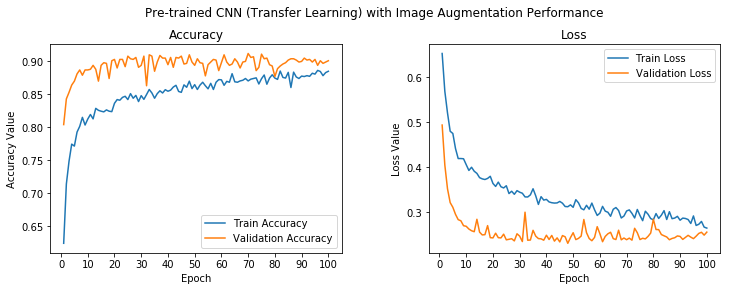

In [91]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
model.save('cats_dogs_tlearn_img_aug_cnn.h5')

# Training with fine tuning

In [ ]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
print("Trainable layers:", vgg_model.trainable_weights)


layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])



train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)




from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model.summary()



history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

## We got near 90% accuracy on our best architecture.Now let's try our squeeze net and see how far could we go..above steps are absolutely necessary to validate our ideas..in this case as it is a research paper most likely the results will align but in the wild when we are testing our ideas this process of running abalation studies is very important..

# SQUEEZE-NET ARCHITECTURE

In [196]:
import keras
from keras.layers.core import Layer
import keras.backend as K
import tensorflow as tf



from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, BatchNormalization,Activation,Dropout, Dense, Input, GlobalAveragePooling2D, Reshape, Dense, multiply, Permute,concatenate,GlobalAveragePooling2D, AveragePooling2D,Flatten


import numpy as np 
from keras.datasets import cifar10 
from keras import backend as K 
from keras.utils import np_utils

import math 
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

def squeezer(input, ratio=10):
    ''' Create a squeeze-excite block
    Args:
        input: input tensor
        filters: number of output filters
        k: width factor
    Returns: a keras tensor
    '''
    init = input
    channel_axis = -1
    filters = init._keras_shape[channel_axis]
    squeezed_shape = (1, 1, filters)
    se_shape = (1, 1, filters)
    sq = GlobalAveragePooling2D()(init)
    sq = Reshape(se_shape)(sq)
    sq = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(sq)
    sq = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(sq)

    

    x = multiply([init, sq])
    return x




def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output




kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)



input_layer = Input(shape=(150, 150, 3))
bn_axis = 3

# orginal inception improved by adding batchnormalization..
x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = BatchNormalization(axis=bn_axis, scale=False)(x)
x = Activation('relu')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)

x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)

x = BatchNormalization(axis=bn_axis, scale=False)(x)
x = Activation('relu')(x)

x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = BatchNormalization(axis=bn_axis, scale=False)(x)
x = Activation('relu')(x)

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

In [197]:
x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = squeezer(x)




x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')
x = squeezer(x)



x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')

x = squeezer(x)

x = AveragePooling2D((5, 5), strides=3)(x)
x = Conv2D(123,(2,2))(x)
x = BatchNormalization(axis=bn_axis, scale=False)(x)
x = Activation('relu')(x)
x = Flatten()(x)


x = Dense(60, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(1, activation='softmax', name='output_1')(x)


model = Model(input_layer,x, name='inception_simple')
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4),
              metrics=['accuracy'])

In [198]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv_1_7x7/2 (Conv2D)           (None, 75, 75, 64)   9472        input_29[0][0]                   
__________________________________________________________________________________________________
batch_normalization_70 (BatchNo (None, 75, 75, 64)   192         conv_1_7x7/2[0][0]               
__________________________________________________________________________________________________
activation_66 (Activation)      (None, 75, 75, 64)   0           batch_normalization_70[0][0]     
__________________________________________________________________________________________________
max_pool_1

In [195]:
%%time
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 67s 665ms/step - loss: 7.8596 - acc: 0.5070 - val_loss: 7.6364 - val_acc: 0.5210
Epoch 2/100
100/100 [==============================] - 44s 438ms/step - loss: 8.0509 - acc: 0.4950 - val_loss: 8.0509 - val_acc: 0.4950
Epoch 3/100
100/100 [==============================] - 45s 451ms/step - loss: 7.9924 - acc: 0.4987 - val_loss: 8.1466 - val_acc: 0.4890
Epoch 4/100
100/100 [==============================] - 46s 456ms/step - loss: 7.9606 - acc: 0.5007 - val_loss: 7.8118 - val_acc: 0.5100
Epoch 5/100
100/100 [==============================] - 47s 468ms/step - loss: 7.9340 - acc: 0.5023 - val_loss: 8.0031 - val_acc: 0.4980
Epoch 6/100
100/100 [==============================] - 45s 451ms/step - loss: 8.0403 - acc: 0.4957 - val_loss: 8.1147 - val_acc: 0.4910
Epoch 7/100
100/100 [==============================] - 45s 447ms/step - loss: 7.9287 - acc: 0.5027 - val_loss: 8.0509 - val_acc: 0.4950
Epoch 8/100
100/100 [===========================

KeyboardInterrupt: 

# As we see this training strategy is not working ...let's try different one..

In [200]:
%%time
epochs = 25
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=val_generator, validation_steps=50, verbose=1,callbacks=[lr_sc])

Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
100/100 [==============================] - 44s 442ms/step - loss: 7.9074 - acc: 0.5040 - val_loss: 7.8915 - val_acc: 0.5050
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
100/100 [==============================] - 43s 434ms/step - loss: 7.9234 - acc: 0.5030 - val_loss: 7.8596 - val_acc: 0.5070
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.01.
100/100 [==============================] - 43s 435ms/step - loss: 7.9606 - acc: 0.5007 - val_loss: 8.0190 - val_acc: 0.4970
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.01.
100/100 [==============================] - 43s 435ms/step - loss: 8.0668 - acc: 0.4940 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.01.
100/100 [==============================] - 44s 437ms/step - loss: 7.9393 - acc: 0.5020 - val_loss: 8.0987 - val_ac

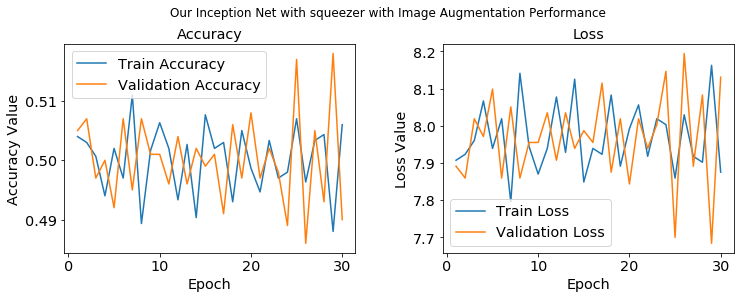

In [202]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Our Inception Net with squeezer with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
model.save('cats_dogs_IncepSqimageAug_img_aug_cnn.h5')

In [213]:
basic_cnn.p

(1, 150, 150, 3)
Predictions for our sample image:
 
Basic CNN: ['cat'] 
CNN with Img Augmentation: ['cat'] 
Pre-trained CNN (Transfer Learning): ['cat'] 
Pre-trained CNN with Img Augmentation (Transfer Learning): ['cat']


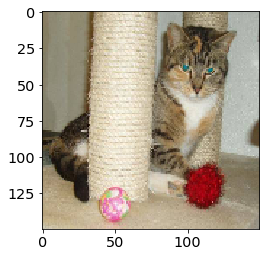

In [206]:
from keras.models import load_model
basic_cnn = load_model('cats_dogs_basic_cnn.h5')
img_aug_cnn = load_model('cats_dogs_cnn_img_aug.h5')
tl_cnn = load_model('cats_dogs_tlearn_basic_cnn.h5')
tl_img_aug_cnn = load_model('cats_dogs_tlearn_img_aug_cnn.h5')

sc_img_aug_inception_sq = load_model('cats_dogs_IncepSqimageAug_img_aug_cnn.h5')



IMG_DIM = (150, 150)
input_shape = (150, 150, 3)
num2class_label_transformer = lambda l: ['cat' if x == 0 else 'dog' for x in l]
class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]


vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                  input_shape=input_shape)
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

def get_bottleneck_features(model, input_imgs):
    
    features = model.predict(input_imgs, verbose=0)
    return features




sample_img_path = 'my_cat.jpg'
sample_img = load_img(sample_img_path, target_size=IMG_DIM)
sample_img_tensor = img_to_array(sample_img)
sample_img_tensor = np.expand_dims(sample_img_tensor, axis=0)
sample_img_tensor /= 255.

print(sample_img_tensor.shape)
plt.imshow(sample_img_tensor[0])





cnn_prediction = num2class_label_transformer(basic_cnn.predict_classes(sample_img_tensor, verbose=0))
cnn_img_aug_prediction = num2class_label_transformer(img_aug_cnn.predict_classes(sample_img_tensor, verbose=0))
tlearn_cnn_prediction = num2class_label_transformer(tl_cnn.predict_classes(get_bottleneck_features(vgg_model, 
                                                                                                    sample_img_tensor), 
                                                                            verbose=0))
tlearn_cnn_img_aug_prediction = num2class_label_transformer(tl_img_aug_cnn.predict_classes(sample_img_tensor, verbose=0))
sc_img_aug_inception_sq_prediction = num2class_label_transformer(sc_img_aug_inception_sq.predict_classes(sample_img_tensor, verbose=0))

print('Predictions for our sample image:\n', 
      '\nBasic CNN:', cnn_prediction, 
      '\nCNN with Img Augmentation:', cnn_img_aug_prediction, 
      '\nPre-trained CNN (Transfer Learning):', tlearn_cnn_prediction,
      '\nPre-trained CNN with Img Augmentation (Transfer Learning):', tlearn_cnn_img_aug_prediction)

#'\nFrom scratch inception with squeezenet:', sc_img_aug_inception_sq_prediction)

In [214]:
sc_img_aug_inception_sq.predict(sample_img_tensor)

array([[1.]], dtype=float32)

In [215]:
sc_img_aug_inception_sq_prediction = num2class_label_transformer(sc_img_aug_inception_sq.predict(sample_img_tensor, verbose=0))
print(sc_img_aug_inception_sq_prediction)

['dog']


## oh's that's a wrong prediction..

In [208]:
IMG_DIM = (150, 150)

test_files = glob.glob('cats_dogs_test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[1].split('.')[0].strip() for fn in test_files]

print('Test dataset shape:', test_imgs.shape)



test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255

test_labels_enc = class2num_label_transformer(test_labels)

print(test_labels[0:5], test_labels_enc[0:5])


predictions = basic_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)

display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Test dataset shape: (1000, 150, 150, 3)
['dog', 'cat', 'cat', 'cat', 'dog'] [1, 0, 0, 0, 1]
Model Performance metrics:
------------------------------
Accuracy: 0.712
Precision: 0.7201
Recall: 0.712
F1 Score: 0.7093

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        cat       0.68      0.81      0.74       500
        dog       0.76      0.62      0.68       500

avg / total       0.72      0.71      0.71      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  404        96 
        dog  192        308


In [209]:
predictions = img_aug_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)

display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.813
Precision: 0.8166
Recall: 0.813
F1 Score: 0.8125

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        cat       0.85      0.76      0.80       500
        dog       0.78      0.87      0.82       500

avg / total       0.82      0.81      0.81      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  380        120
        dog  67         433


In [210]:
test_bottleneck_features = get_bottleneck_features(vgg_model, test_imgs_scaled)

predictions = tl_cnn.predict_classes(test_bottleneck_features, verbose=0)
predictions = num2class_label_transformer(predictions)

display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.887
Precision: 0.8872
Recall: 0.887
F1 Score: 0.887

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        cat       0.90      0.88      0.89       500
        dog       0.88      0.90      0.89       500

avg / total       0.89      0.89      0.89      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  438        62 
        dog  51         449


In [211]:
predictions = tl_img_aug_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)

display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.897
Precision: 0.9
Recall: 0.897
F1 Score: 0.8968

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        cat       0.93      0.85      0.89       500
        dog       0.87      0.94      0.90       500

avg / total       0.90      0.90      0.90      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  427        73 
        dog  30         470


In [216]:
predictions = sc_img_aug_inception_sq.predict(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)

display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1 Score: 0.3333

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        cat       0.00      0.00      0.00       500
        dog       0.50      1.00      0.67       500

avg / total       0.25      0.50      0.33      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  0          500
        dog  0          500


/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# PRACTICAL ASIDE :

## Guiding question:How will you choose learning rate ? 
### ANS: The following approach is based on leslie n smith's paper - cyclical learning rates..so let's get to the code.

## LEARNING RATE FINDER:

In [131]:
%matplotlib inline
#pytorch packages
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
#To download the dataset for torchvision
import torchvision
from torchvision import datasets, transforms
#For plots
import matplotlib.pyplot as plt
PATH = '.'
trn_set = datasets.MNIST(PATH, train=True, download=True)
tst_set = datasets.MNIST(PATH, train=False, download=True)

In [132]:
len(trn_set.train_data), len(tst_set.test_data)

(60000, 10000)

In [133]:
mean = torch.mean(trn_set.train_data.type(torch.FloatTensor))/255.
std = torch.std(trn_set.train_data.type(torch.FloatTensor))/255.
mean,std


(tensor(0.1307), tensor(0.3081))

In [134]:
tsfms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean,), (std,))])
trn_set = datasets.MNIST(PATH, train=True,transform=tsfms)
tst_set = datasets.MNIST(PATH, train=False,transform=tsfms)
trn_loader = torch.utils.data.DataLoader(trn_set, batch_size=64, shuffle=True, num_workers=0)
tst_loader = torch.utils.data.DataLoader(tst_set, batch_size=64, shuffle=False, num_workers=0)

In [135]:
class SimpleNeuralNet(nn.Module):
    def __init__(self, n_in, n_hidden, n_out):
        super().__init__()
        self.linear1 = nn.Linear(n_in, n_hidden)
        self.linear2 = nn.Linear(n_hidden, n_out)
    
    def forward(self,x):
        x = x.view(x.size(0),-1)
        x = F.relu(self.linear1(x))
        return F.log_softmax(self.linear2(x), dim=-1)

In [136]:
net = SimpleNeuralNet(28*28,100,10)
optimizer = optim.SGD(net.parameters(),lr=1e-2)

In [137]:
def train(nb_epoch):
    for epoch in range(nb_epoch):
        running_loss = 0.
        corrects = 0
        print(f'Epoch {epoch+1}:')
        for data in trn_loader:
            #separate the inputs from the labels
            inputs,labels = data
            #wrap those into variables to keep track of how they are created and be able to compute their gradient.
            inputs, labels = Variable(inputs), Variable(labels)
            #Put the gradients back to zero
            optimizer.zero_grad()
            #Compute the outputs given by our model at this stage.
            outputs = net(inputs)
            _,preds = torch.max(outputs.data,1)
            #Compute the loss
            loss = F.nll_loss(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            corrects += torch.sum(labels.data == preds)
            #Backpropagate the computation of the gradients
            loss.backward()
            #Do the step of the SGD
            optimizer.step()
        print(f'Loss: {running_loss/len(trn_set)}  Accuracy: {100.*corrects/len(trn_set)}')
        
        
def validate():
    running_loss = 0.
    corrects = 0
    for data in tst_loader:
        #separate the inputs from the labels
        inputs,labels = data
        #wrap those into variables to keep track of how they are created and be able to compute their gradient.
        #Even if we don't require the gradient here, a nn.Module expects a variable.
        inputs, labels = Variable(inputs), Variable(labels)
        #Compute the outputs given by our model at this stage.
        outputs = net(inputs)
        _,preds = torch.max(outputs.data,1)
        #Compute the loss
        loss = F.nll_loss(outputs, labels)
        running_loss += loss.data.item() * inputs.size(0)
        corrects += torch.sum(labels.data == preds)
    print(f'Loss: {running_loss/len(tst_set)}  Accuracy: {100.*corrects/len(tst_set)}')        

In [138]:
train(10)

Epoch 1:
Loss: 0.591010229508082  Accuracy: 84
Epoch 2:
Loss: 0.3079792944232623  Accuracy: 91
Epoch 3:
Loss: 0.2633318155129751  Accuracy: 92
Epoch 4:
Loss: 0.2316359231432279  Accuracy: 93
Epoch 5:
Loss: 0.20644472065369288  Accuracy: 94
Epoch 6:
Loss: 0.18607514005502065  Accuracy: 94
Epoch 7:
Loss: 0.16931549033721288  Accuracy: 95
Epoch 8:
Loss: 0.1555294797817866  Accuracy: 95
Epoch 9:
Loss: 0.14370953586300214  Accuracy: 96
Epoch 10:
Loss: 0.133708127673467  Accuracy: 96


In [139]:
validate()

Loss: 0.13692276518344879  Accuracy: 95


In [140]:
def find_lr(init_value = 1e-8, final_value=10., beta = 0.98):
    num = len(trn_loader)-1
    mult = (final_value / init_value) ** (1/num)
    lr = init_value
    optimizer.param_groups[0]['lr'] = lr
    avg_loss = 0.
    best_loss = 0.
    batch_num = 0
    losses = []
    log_lrs = []
    for data in trn_loader:
        batch_num += 1
        #As before, get the loss for this mini-batch of inputs/outputs
        inputs,labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        #Compute the smoothed loss
        avg_loss = beta * avg_loss + (1-beta) *loss.data[0]
        smoothed_loss = avg_loss / (1 - beta**batch_num)
        #Stop if the loss is exploding
        if batch_num > 1 and smoothed_loss > 4 * best_loss:
            return log_lrs, losses
        #Record the best loss
        if smoothed_loss < best_loss or batch_num==1:
            best_loss = smoothed_loss
        #Store the values
        losses.append(smoothed_loss)
        log_lrs.append(math.log10(lr))
        #Do the SGD step
        loss.backward()
        optimizer.step()
        #Update the lr for the next step
        lr *= mult
        optimizer.param_groups[0]['lr'] = lr
    return log_lrs, losses

In [141]:
net = SimpleNeuralNet(28*28,100,10)
optimizer = optim.SGD(net.parameters(),lr=1e-1)
criterion = F.nll_loss

In [142]:
logs,losses = find_lr()

/home/vinay/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


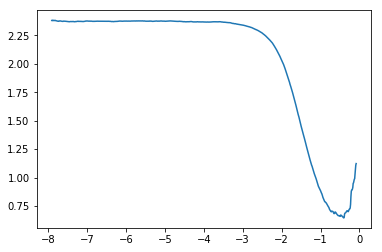

In [143]:
plt.plot(logs[10:-5],losses[10:-5])

In [144]:
net = SimpleNeuralNet(28*28,100,10)
optimizer = optim.SGD(net.parameters(),lr=1e-1)
train(1)

Epoch 1:
Loss: 0.26445082366863887  Accuracy: 92


# SOME MODEL PREFORMANCE UTILS

In [61]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )